In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

<ipython-input-15-9a8741b13e45>:69: RuntimeWarning: divide by zero encountered in log
  theor_regret = [k*np.sqrt(8*t*np.log(t)) for t in range(T)]
<ipython-input-15-9a8741b13e45>:69: RuntimeWarning: invalid value encountered in scalar multiply
  theor_regret = [k*np.sqrt(8*t*np.log(t)) for t in range(T)]


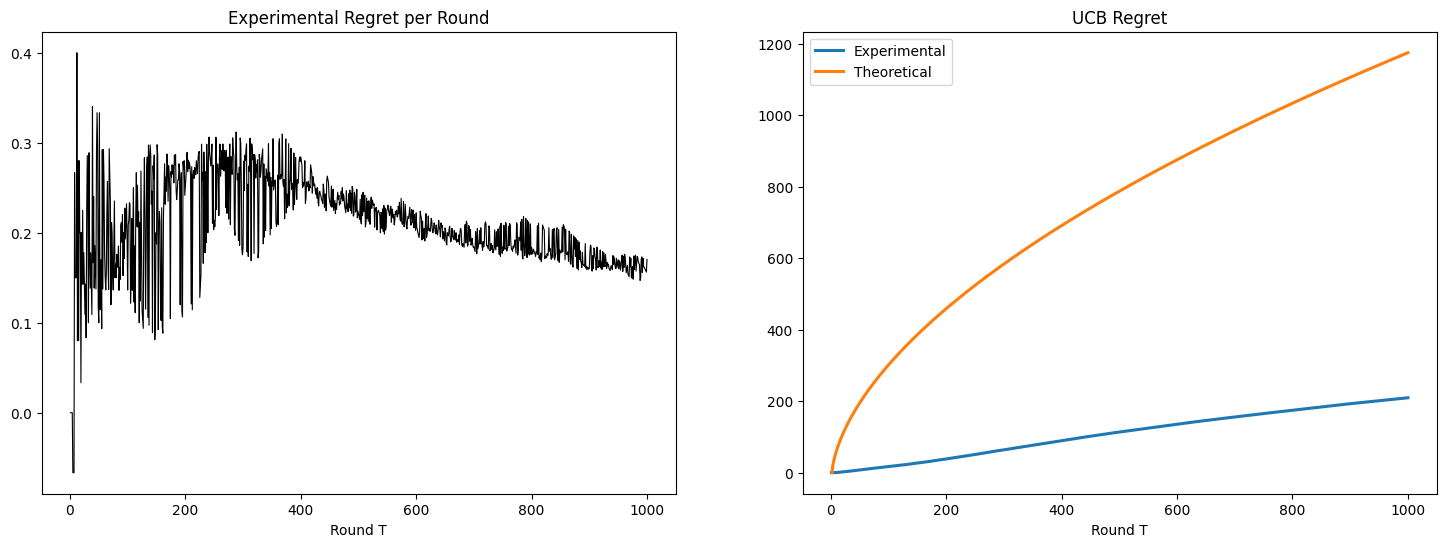

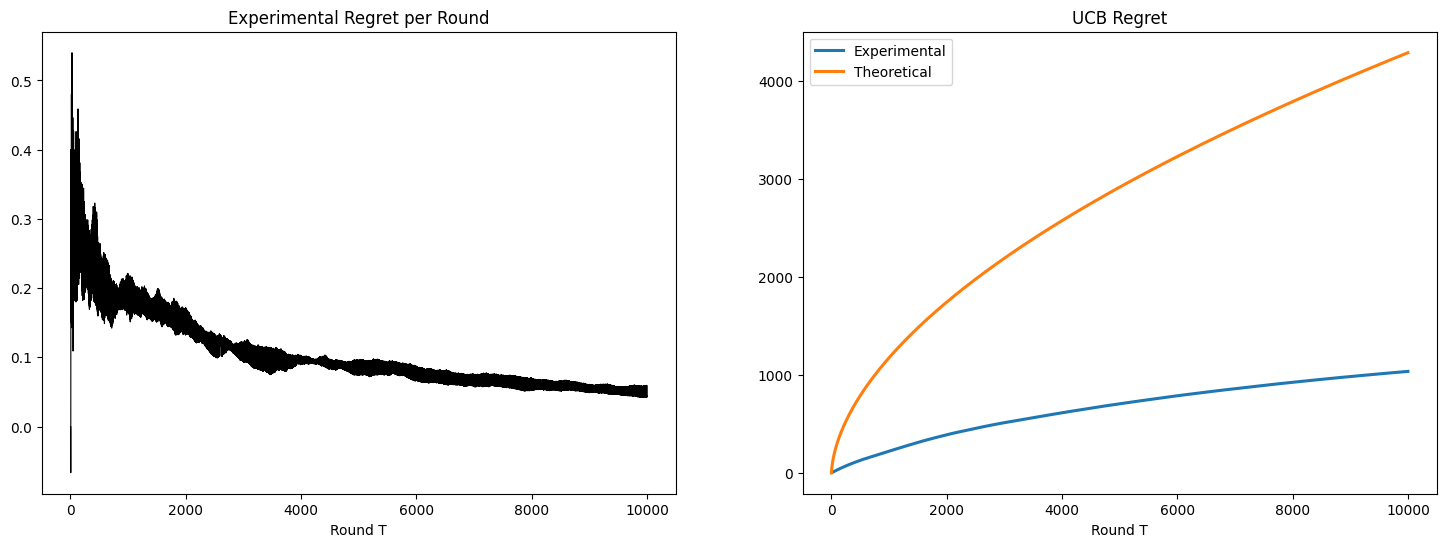

In [15]:
def ucb_algorithm(T):

    k = 5         # Number of articles/arms
    uc = 4        # Number of user classes

    # Probability matrix, num_of_classes x k
    Pr = np.array([[0.8, 0.6, 0.5, 0.4, 0.2],
                   [0.2, 0.4, 0.5, 0.6, 0.8],
                   [0.2, 0.4, 0.8, 0.6, 0.5],
                   [0.2, 0.4, 0.8, 0.6, 0.5]])

    N = np.zeros((uc,k))              # Article clicked count
    mue = np.zeros((uc,k))            # mu estimate
    reward = np.zeros((uc,k))

    user = []                         # List of users per time step
    user_count = np.zeros((uc,))

    inst_score = np.zeros((uc,T))     # Score of a given round
    inst_best = np.zeros((uc,T))      # Best score of a given round c:\Users\angel\Downloads\RLassignment1.ipynb
    best_score = np.zeros((uc,T))     # Accumulated best score until given round
    alg_score = np.zeros((uc,T))      # Accumulated algorithm score until given round
    regret = np.zeros((T,))

    # Forcing every user to click one arm once
    for i in range(k):
        for up in range(uc):

            N[up][i] += 1                                         # Times article gets presented
            X = np.random.binomial(1,Pr[up][i])                   # Bernoulli click decision
            reward[up][i] += X                                    # Accumulated reward until given round
            mue[up][i] = np.divide(reward[up][i], N[up][i])       # Click-probability estimation

            inst_score[up][i*(k-1)+up] = X
            alg_score[up][i*(k-1)+up] = sum(inst_score[up][0:i*(k-1)+up])
            inst_best[up][i*(k-1)+up] = np.amax(Pr[up])
            best_score[up][i*(k-1)+up] = sum(inst_best[up][0:i*(k-1)+up])

            user_count[up] += 1
            regret[i*(k-1)+up] = np.divide(best_score[up][i*(k-1)+up]-alg_score[up][i*(k-1)+up],user_count[up]+1)

            user.append(up)                                       # Add user to the list

    for t in range(k*uc,int(T)):

        # Generate random user
        u = np.random.randint(0,uc)                               # Select random user
        user.append(u)

        # UCB algorithm decision
        ucb = np.add(mue[u], np.sqrt(np.divide(np.multiply(np.log(T),2),N[u])))   # Compute ucb value
        j = np.argmax(ucb)                                        # Choose best article to present

        # Maintain estimates for arm j
        N[u][j] += 1
        X = np.random.binomial(1,Pr[u][j])
        reward[u][j] += X
        mue[u][j] = np.divide(reward[u][j], N[u][j])

        inst_score[u][t] = X
        alg_score[u][t] = sum(inst_score[u][0:t])
        inst_best[u][t] = np.amax(Pr[u])
        best_score[u][t] = sum(inst_best[u][0:t])

        user_count[u] += 1
        regret[t] = np.divide(best_score[u][t]-alg_score[u][t],user_count[u]+1)

    cum_regret = [sum(regret[0:t]) for t in range(T)]
    theor_regret = [k*np.sqrt(8*t*np.log(t)) for t in range(T)]

    '''
    print(inst_score)
    print(inst_best)
    print(alg_score)
    print(best_score)
    print(regret)
    print(np.round(mue, decimals = 2))
    print(N)
    '''
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    plt.title("Experimental Regret per Round")
    plt.xlabel("Round T")
    plt.plot(np.arange(1,T+1), regret, color = 'black', linewidth = 0.8)
    plt.subplot(1, 2, 2)
    plt.title("UCB Regret")
    plt.xlabel("Round T")
    plt.plot(np.arange(1,T+1), cum_regret,  linewidth = 2.2)
    plt.plot(np.arange(1,T+1), theor_regret, linewidth = 2.2)
    plt.legend(["Experimental", "Theoretical"])
    plt.show()



if __name__ == '__main__':
    ucb_algorithm(1000)
    ucb_algorithm(10000)